In [ ]:
# For data reading
import pandas as pd 

# For reading the array 
import numpy as np

# For visualize the data and plottting parameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,108]
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# For data reading | manipulation :
import pandas as pd 

# For reading the array :
import numpy as np

# For visualize the data and plottting patameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

# To suppress warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# Import train-test split :
from sklearn.model_selection import train_test_split

# Import 'stats' libraries for modeling :
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS

# To scaled the data :
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # Scaling
import math
from sklearn.metrics import  r2_score
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Dealing with the missing values

In [ ]:
# Reading data :
so2 = pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/pollutants/Daily_data/nagpur/so2_1.csv')
satso2=pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/relationship/nagpur/SO2.csv')


In [ ]:
so2

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,NaN
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,NaN
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,NaN
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,NaN
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,NaN
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,21.132
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,7.310
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,10.482
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,7.460


In [ ]:
satso2

,Date,Satellite,converted,CPCB,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,01-01-16,4.684920e-11,0.046849,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-16,3.076670e-11,0.030767,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-16,1.778370e-11,0.017784,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-16,1.219080e-11,0.012191,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-16,1.372500e-11,0.013725,NaN,NaN,NaN,NaN,slope:,5.686761
...,...,...,...,...,...,...,...,...,...
1456,27-12-19,1.502720e-12,0.001503,21.132,NaN,NaN,NaN,NaN,NaN
1457,28-12-19,5.616670e-12,0.005617,7.310,NaN,NaN,NaN,NaN,NaN
1458,29-12-19,3.432670e-11,0.034327,10.482,NaN,NaN,NaN,NaN,NaN
1459,30-12-19,6.615420e-11,0.066154,7.460,NaN,NaN,NaN,NaN,NaN


In [ ]:
extracted_col=satso2['converted']

so2=so2.join(extracted_col)

extracted_col1=satso2['CPCB']
so2=so2.join(extracted_col1)



In [ ]:
so2

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2,converted,CPCB
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,NaN,0.046849,NaN
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,NaN,0.030767,NaN
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,NaN,0.017784,NaN
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,NaN,0.012191,NaN
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,NaN,0.013725,NaN
...,...,...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,21.132,0.001503,21.132
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,7.310,0.005617,7.310
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,10.482,0.034327,10.482
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,7.460,0.066154,7.460


In [ ]:
#finding % of the missing values in each coloumn
nullValues = so2.isnull().sum()
nullValues

Date             0
T2M              0
PRECTOTCORR      0
PS               0
RH2M             0
WS10M            0
WD10M            0
 SO2           501
converted        0
CPCB           501
dtype: int64

In [ ]:
nullValuesPercent = 100*nullValues/len(so2)
nullValuesPercent

Date            0.000000
T2M             0.000000
PRECTOTCORR     0.000000
PS              0.000000
RH2M            0.000000
WS10M           0.000000
WD10M           0.000000
 SO2           34.291581
converted       0.000000
CPCB           34.291581
dtype: float64

In [ ]:
so2_new=so2[' SO2'].fillna((-55)*so2['converted']+14.81)

so2_new

0       12.233294
1       13.117833
2       13.831895
3       14.139504
4       14.055125
          ...    
1456    21.132000
1457     7.310000
1458    10.482000
1459     7.460000
1460    18.830000
Name:  SO2, Length: 1461, dtype: float64

In [ ]:
so2_interpolate=so2_new.interpolate()

so2_interpolate

0       12.233294
1       13.117833
2       13.831895
3       14.139504
4       14.055125
          ...    
1456    21.132000
1457     7.310000
1458    10.482000
1459     7.460000
1460    18.830000
Name:  SO2, Length: 1461, dtype: float64

In [ ]:
so2_interpolate=so2_interpolate.bfill()

In [ ]:
nullValues = so2_interpolate.isnull().sum()
nullValues

0

In [ ]:
so2_interpolate.to_csv('filled.csv', index=False)

###train test split

In [ ]:
so2 = pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/processed_data/nagpur/so2.csv')

In [ ]:
so2

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,12.233294
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,13.117833
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,13.831895
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,14.139504
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,14.055125
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,21.132000
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,7.310000
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,10.482000
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,7.460000


In [ ]:
so2=so2.drop(['Date'],axis=1)

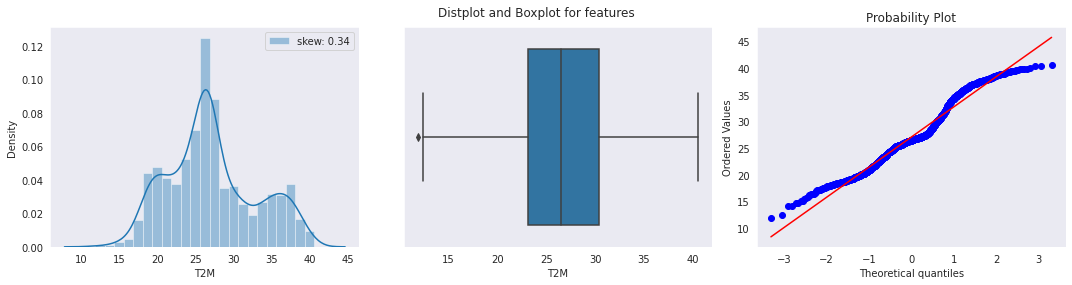

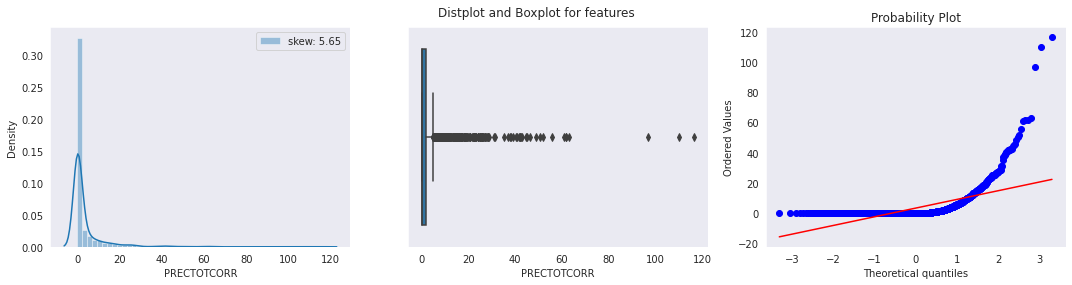

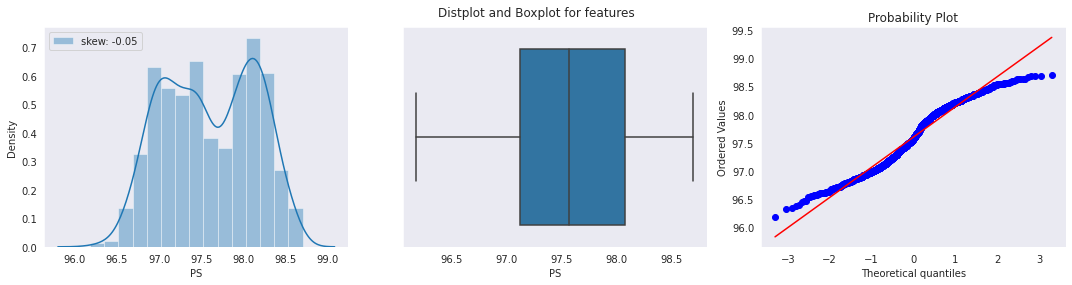

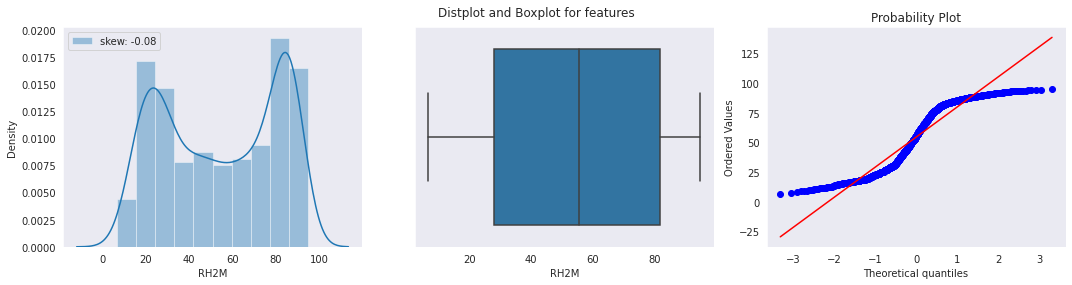

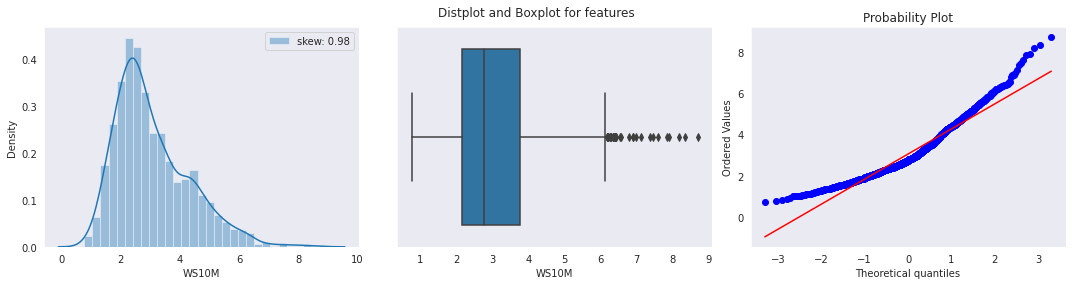

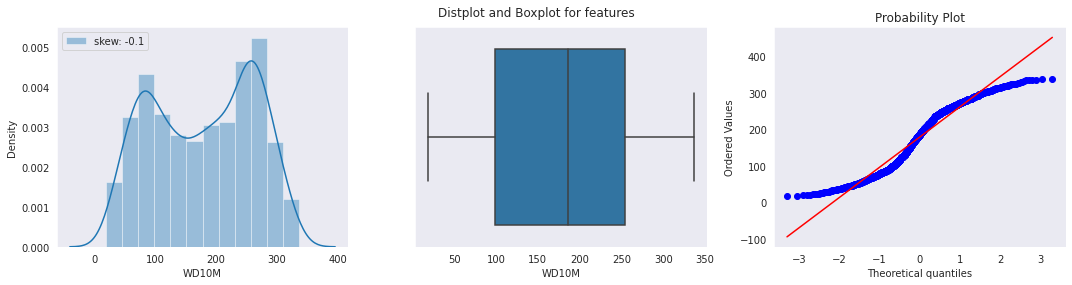

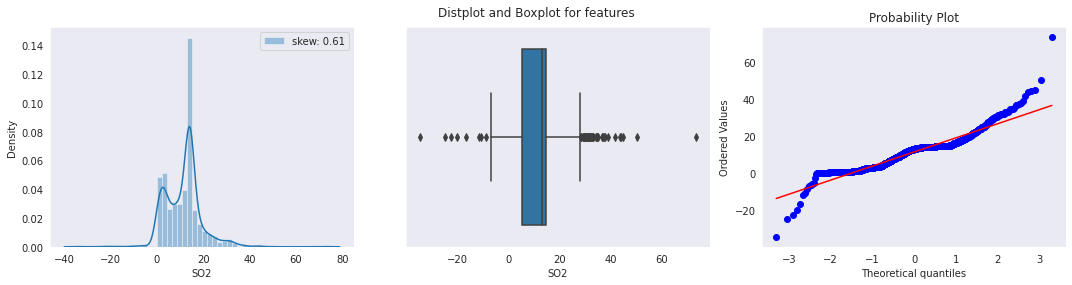

In [ ]:
from scipy import stats
features=so2.columns
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(so2[col], label="skew: " + str(np.round(so2[col].skew(),2)))
    plt.suptitle("Distplot and Boxplot for features")
    plt.legend()
    plt.subplot(132)
    sns.boxplot(so2[col])
    plt.subplot(133)
    stats.probplot(so2[col], plot=plt)
    plt.tight_layout()
    plt.show()

###Dealing with the outliers in SO2 col

In [ ]:
so2['zscore'] = ( so2.SO2 - so2.SO2.mean() ) / so2.SO2.std()
so2

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2,zscore
0,23.26,0.00,98.55,35.38,1.84,144.25,12.233294,0.102402
1,23.38,0.00,98.53,33.19,1.52,137.00,13.117833,0.213829
2,21.19,0.00,98.45,32.56,2.90,62.69,13.831895,0.303781
3,20.94,0.00,98.51,35.06,2.67,86.00,14.139504,0.342531
4,21.66,0.00,98.41,30.44,1.73,108.44,14.055125,0.331902
...,...,...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38,21.132000,1.223390
1457,11.83,0.00,98.43,57.94,3.41,68.00,7.310000,-0.517795
1458,12.38,0.00,98.43,58.62,2.76,64.56,10.482000,-0.118212
1459,14.22,0.10,98.35,66.81,2.78,75.00,7.460000,-0.498900


In [ ]:
so2[(so2.zscore<-3) | (so2.zscore>3)]

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2,zscore
89,31.15,0.0,97.82,25.12,1.74,176.94,73.430000,7.811478
392,23.53,0.0,98.23,44.44,2.55,192.06,-22.447917,-4.266462
395,23.31,0.0,98.19,24.88,1.43,155.88,-16.748542,-3.548500
396,23.73,0.0,98.08,26.38,1.58,171.81,-20.236458,-3.987880
418,27.14,0.0,97.77,18.56,2.90,312.25,-34.486042,-5.782929
843,34.76,0.0,97.42,17.62,2.56,100.19,44.152000,4.123268
861,37.73,0.0,97.28,22.50,2.80,167.31,37.702000,3.310748
990,26.66,0.9,97.39,77.50,2.06,31.06,50.206000,4.885902
1015,25.58,0.0,97.65,76.69,4.07,86.88,44.755000,4.199229
1063,22.31,0.0,98.41,53.25,1.88,79.12,36.842000,3.202412


In [ ]:


so2_no_outliers = so2[(so2.zscore>-3) & (so2.zscore<3)]
so2_no_outliers.head()



,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2,zscore
0,23.26,0.0,98.55,35.38,1.84,144.25,12.233294,0.102402
1,23.38,0.0,98.53,33.19,1.52,137.00,13.117833,0.213829
2,21.19,0.0,98.45,32.56,2.90,62.69,13.831895,0.303781
3,20.94,0.0,98.51,35.06,2.67,86.00,14.139504,0.342531
4,21.66,0.0,98.41,30.44,1.73,108.44,14.055125,0.331902


In [ ]:


so2_no_outliers.shape



(1445, 8)

In [ ]:


so2_no_outliers=so2_no_outliers.drop(['zscore'],axis=1)



In [ ]:
so2_no_outliers

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2
0,23.26,0.00,98.55,35.38,1.84,144.25,12.233294
1,23.38,0.00,98.53,33.19,1.52,137.00,13.117833
2,21.19,0.00,98.45,32.56,2.90,62.69,13.831895
3,20.94,0.00,98.51,35.06,2.67,86.00,14.139504
4,21.66,0.00,98.41,30.44,1.73,108.44,14.055125
...,...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38,21.132000
1457,11.83,0.00,98.43,57.94,3.41,68.00,7.310000
1458,12.38,0.00,98.43,58.62,2.76,64.56,10.482000
1459,14.22,0.10,98.35,66.81,2.78,75.00,7.460000


In [ ]:
so2=so2_no_outliers
so2

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2
0,23.26,0.00,98.55,35.38,1.84,144.25,12.233294
1,23.38,0.00,98.53,33.19,1.52,137.00,13.117833
2,21.19,0.00,98.45,32.56,2.90,62.69,13.831895
3,20.94,0.00,98.51,35.06,2.67,86.00,14.139504
4,21.66,0.00,98.41,30.44,1.73,108.44,14.055125
...,...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38,21.132000
1457,11.83,0.00,98.43,57.94,3.41,68.00,7.310000
1458,12.38,0.00,98.43,58.62,2.76,64.56,10.482000
1459,14.22,0.10,98.35,66.81,2.78,75.00,7.460000


###Correlation
  

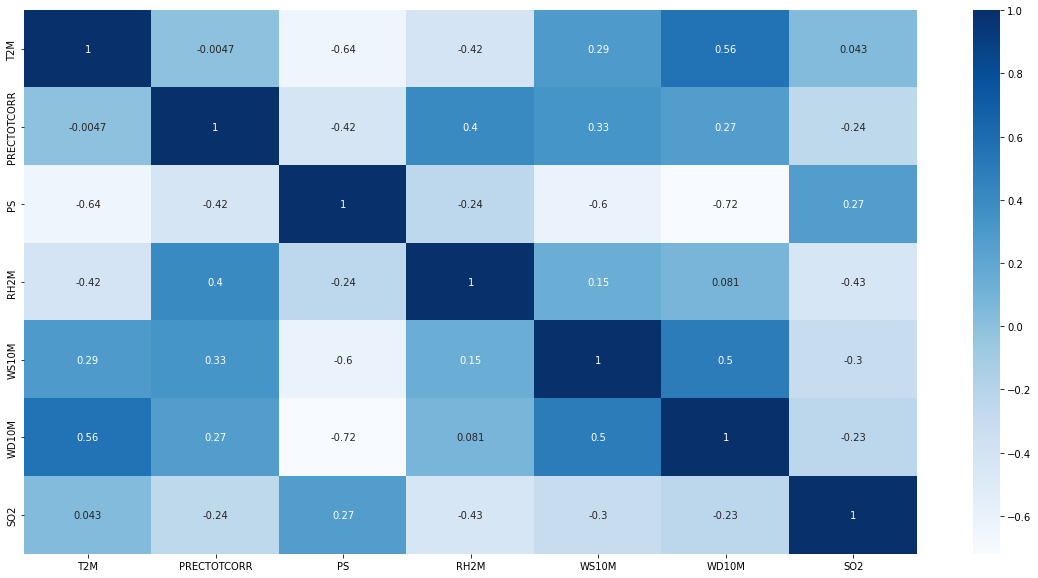

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(so2.corr(), annot=True, cmap='Blues')

plt.show()

###independent and dependent variables

In [ ]:
 x=so2.iloc[:,:-1]
y=so2.iloc[:,-1]

In [ ]:
x

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M
0,23.26,0.00,98.55,35.38,1.84,144.25
1,23.38,0.00,98.53,33.19,1.52,137.00
2,21.19,0.00,98.45,32.56,2.90,62.69
3,20.94,0.00,98.51,35.06,2.67,86.00
4,21.66,0.00,98.41,30.44,1.73,108.44
...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38
1457,11.83,0.00,98.43,57.94,3.41,68.00
1458,12.38,0.00,98.43,58.62,2.76,64.56
1459,14.22,0.10,98.35,66.81,2.78,75.00


In [ ]:
y

0       12.233294
1       13.117833
2       13.831895
3       14.139504
4       14.055125
          ...    
1456    21.132000
1457     7.310000
1458    10.482000
1459     7.460000
1460    18.830000
Name: SO2, Length: 1461, dtype: float64

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

###yeo-johnson transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt_x = PowerTransformer(method='yeo-johnson')
pt_y = PowerTransformer(method='yeo-johnson')
x_train = pt_x.fit_transform(x_train)
x_test = pt_x.transform(x_test)
y_train = pt_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = pt_y.transform(np.array(y_test).reshape(-1,1))

###SVR without hyperparameter tunning

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([-0.66489903,  0.29938797, -1.37715041, -0.39381909, -0.03123521,
       -0.65798047,  0.58244877, -0.09744298,  0.50912141,  0.27730182,
        0.22581637,  0.50703322,  0.74405919,  0.54548442,  0.51399316,
        0.36970626,  0.6551503 , -0.38152356,  0.67703494, -0.16147342,
       -0.14147852, -0.26568556, -0.04200061,  0.08477533,  0.43619366,
        0.54374632,  0.21641013,  0.28000741, -1.47602187,  0.43762125,
        0.70458387,  0.18501035, -0.4621086 , -1.34532379,  0.60209356,
        0.32976937, -1.29292563, -0.73871689, -0.01695801, -0.07408851,
        0.01580237,  0.81792432, -0.95805714, -0.22771409,  0.5408485 ,
        0.60152546,  0.52813727,  0.77764082, -0.37309297, -0.34485804,
        0.59329528, -0.96891786, -0.90827052,  0.12752535, -0.72937181,
        0.31299434,  0.77083126,  0.50638665, -0.1197991 ,  0.61237324,
       -0.75581311,  0.23081637, -0.25366778, -0.39630832, -1.22843938,
        0.37732938, -0.23165187,  0.47495254, -0.13875914, -1.42

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.21045838285927376
mean_sqrd_error is  0.7528877110849526
Root mean squared error of is 0.8676910228214607
Mean Absolute error is 0.6205170126373548


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 0.829     ],
       [14.28659707],
       [ 0.307     ],
       [14.29118957],
       [18.489     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 6.38236954],
       [13.28819726],
       [ 1.84618798],
       [ 8.2522004 ],
       [10.84510845]])

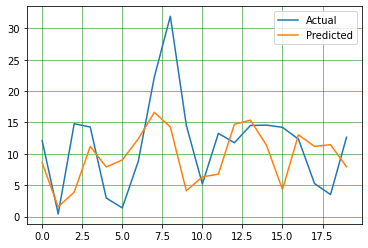

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL PM2.5"] = y_test.flatten()
result["PREDICTED PM2.5"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL PM2.5"] - result["PREDICTED PM2.5"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL PM2.5"] - result["PREDICTED PM2.5"] ) / result["ACTUAL PM2.5"] ) * 100
result.head(15)

,ACTUAL PM2.5,PREDICTED PM2.5,DIFFERENCE,PERCENTAGE ERROR
0,0.829000,6.382370,-5.553370,669.887762
1,14.286597,13.288197,0.998400,6.988367
2,0.307000,1.846188,-1.539188,501.364164
3,14.291190,8.252200,6.038989,42.256728
4,18.489000,10.845108,7.643892,41.342915
5,3.276000,6.429274,-3.153274,96.253776
6,21.767000,15.432181,6.334819,29.102856
7,14.153141,10.364512,3.788629,26.768823
8,20.777000,14.872438,5.904562,28.418741
9,10.731063,13.122864,-2.391802,22.288585


###SVR using the hyperparameter tunning

In [ ]:
##applying Gridsearchcv on SVR
svr=SVR(kernel='rbf')
grid_sv = GridSearchCV(svr, param_grid={"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}, scoring='r2', verbose=3)
grid_sv.fit(x_train, y_train)
print(grid_sv.best_score_)
print(grid_sv.best_estimator_)
print(grid_sv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.230 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.287 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.167 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.276 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.274 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.230 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.266 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.202 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.263 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.305 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.204 total time=   0.1s
[CV 2/5] END .................C=0.1, gamma=0.01

In [ ]:

#SVR
regressor = SVR(kernel = 'rbf', C=1, gamma=1)
regressor.fit(x_train,y_train)

SVR(C=1, gamma=1)

In [ ]:
y_prediction=regressor.predict(x_test)
y_prediction

array([-1.16527181e+00,  3.10468675e-01, -1.53639668e+00, -4.84189282e-02,
        1.29829237e-01, -7.28827744e-01,  7.59413512e-01, -3.47994423e-01,
        4.67678677e-01,  3.78449739e-01,  2.91782891e-01,  4.00067989e-01,
        1.04775044e+00,  8.36255199e-01,  4.10922638e-01,  2.31557885e-01,
        6.85069684e-01, -3.72278650e-02,  7.20261271e-01, -1.14017510e+00,
        1.32290689e-01, -3.76278010e-01,  2.37369095e-01, -5.47670248e-01,
        6.11425813e-01,  1.02010919e+00,  1.49117084e-01,  3.38950189e-01,
       -1.26583059e+00,  5.24831403e-01,  9.92682104e-01,  2.26174211e-01,
       -5.20369008e-01, -1.28117066e+00,  8.50232359e-01, -1.48728543e-02,
       -1.06014015e+00, -1.45901257e+00,  2.75372090e-01,  2.73497703e-01,
       -6.51221584e-02,  9.56841346e-01, -1.15695479e+00, -1.18144069e+00,
        6.92939685e-01,  4.88211208e-01,  4.54847349e-01,  6.03229039e-01,
       -3.49028359e-01, -2.08827939e-01,  7.97935618e-01, -8.38623611e-01,
       -1.21772136e+00, -

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.21471678628252722
mean_sqrd_error is  0.7488270010012711
Root mean squared error of is 0.8653479074922821
Mean Absolute error is 0.6151042055968383


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 0.829     ],
       [14.28659707],
       [ 0.307     ],
       [14.29118957],
       [18.489     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 3.12573472],
       [13.37125539],
       [ 0.93810734],
       [10.720083  ],
       [12.02656672]])

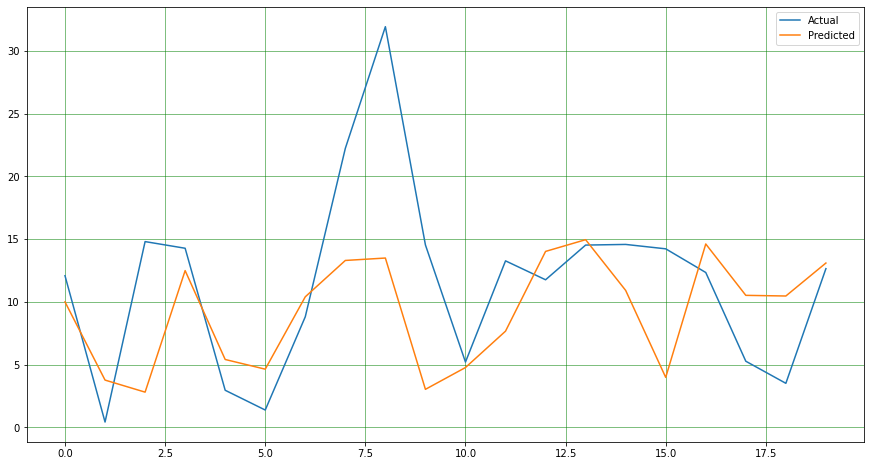

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,0.829000,3.125735,-2.296735,277.048820
1,14.286597,13.371255,0.915342,6.406996
2,0.307000,0.938107,-0.631107,205.572423
3,14.291190,10.720083,3.571107,24.988169
4,18.489000,12.026567,6.462433,34.952855
5,3.276000,5.951137,-2.675137,81.658628
6,21.767000,16.794922,4.972078,22.842274
7,14.153141,8.574412,5.578729,39.416896
8,20.777000,14.557403,6.219597,29.935012
9,10.731063,13.882413,-3.151351,29.366623


###using KNN

In [ ]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
hp_candidates = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsRegressor()
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=5, scoring='r2')
grid.fit(x_train, y_train)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.30621731286612186
KNeighborsRegressor(n_neighbors=17, weights='distance')
{'n_neighbors': 17, 'weights': 'distance'}


In [ ]:
regressor=KNeighborsRegressor(n_neighbors=17, weights='distance')
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=17, weights='distance')

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([[-0.66765903],
       [ 0.18685985],
       [-1.14936594],
       [-0.17281048],
       [-0.1735081 ],
       [-0.77804401],
       [ 0.9320589 ],
       [-0.3882087 ],
       [ 0.67017596],
       [ 0.64322374],
       [ 0.48270956],
       [ 0.33599069],
       [ 1.08994593],
       [ 0.98608075],
       [ 0.74426796],
       [ 0.37174001],
       [ 0.57999064],
       [-0.38932137],
       [ 0.74788181],
       [-0.85094642],
       [-0.11903661],
       [-0.25616543],
       [-0.16748168],
       [-0.13762099],
       [ 0.68245065],
       [ 0.68186422],
       [ 0.04869251],
       [ 0.76159418],
       [-1.25499352],
       [ 0.97821756],
       [ 0.97531548],
       [ 0.48971859],
       [-0.57654974],
       [-1.02005464],
       [ 1.03094612],
       [ 0.33977911],
       [-1.32029074],
       [-0.61203311],
       [-0.02297519],
       [ 0.00484962],
       [ 0.0148725 ],
       [ 1.10496414],
       [-0.98508007],
       [-0.56996591],
       [ 0.51331799],
       [ 0

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.2511655026681733
mean_sqrd_error is  0.7140703902592657
Root mean squared error of is 0.8450268577147508
Mean Absolute error is 0.6316942230521021


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 0.829     ],
       [14.28659707],
       [ 0.307     ],
       [14.29118957],
       [18.489     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 6.36367078],
       [12.4489256 ],
       [ 3.22456243],
       [ 9.82117195],
       [ 9.81616168]])

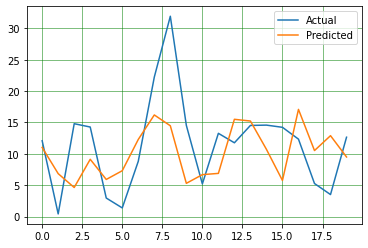

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,0.829000,6.363671,-5.534671,667.632181
1,14.286597,12.448926,1.837671,12.862905
2,0.307000,3.224562,-2.917562,950.346068
3,14.291190,9.821172,4.470018,31.278135
4,18.489000,9.816162,8.672838,46.908098
5,3.276000,5.621886,-2.345886,71.608256
6,21.767000,18.139903,3.627097,16.663282
7,14.153141,8.291559,5.861583,41.415417
8,20.777000,16.105672,4.671328,22.483169
9,10.731063,15.898320,-5.167257,48.152335


###Random forest

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:


from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)



In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}  



In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 60, bootstrap=True) 
regressor.fit( x_train, y_train) 

RandomForestRegressor(max_depth=60, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10)

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([-0.41489341,  0.21325485,  0.29297915, -0.21174839,  0.57585888,
        0.45891579,  0.0064881 , -0.27385969,  0.09966233,  0.37125489,
       -0.42289771,  0.36871247, -0.27904204, -0.55653823, -0.0027121 ,
       -0.35496599, -0.66827238,  0.7910465 , -0.12548817,  0.35158204,
       -0.49943589, -0.14584248,  0.79357426, -0.80817561, -0.69844844,
       -0.21937797, -0.23255167,  0.04776039, -0.98069289,  0.02296996,
        0.54597938,  0.35318806,  0.60127143,  0.50844085,  0.19244467,
       -0.0341073 ,  0.32871148,  0.16777803, -0.18888952, -0.61330455,
       -0.57113195,  0.69812812,  0.32482328,  0.91748894, -0.5500794 ,
       -0.17627564, -0.38597103, -0.1364303 , -0.26564034,  0.1820165 ,
       -0.27426076,  0.618108  , -0.19330743, -0.09240535, -0.03094023,
       -0.59375455, -0.71927538,  0.66066678, -0.11760108,  0.4878345 ,
        0.58851237, -0.65450421, -1.05535558, -0.67428786, -0.04862452,
       -0.10038563, -0.93576587,  0.1873758 , -0.68728368,  0.68

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.31076069916909366
mean_sqrd_error is  0.8434138461082723
Root mean squared error of is 0.9183756563129667
Mean Absolute error is 0.6346474789916474


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[14.10817707],
       [ 5.525     ],
       [13.85057082],
       [14.07933683],
       [ 4.713     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 8.32234517],
       [13.18202028],
       [13.79505975],
       [ 9.90038652],
       [15.96468864]])

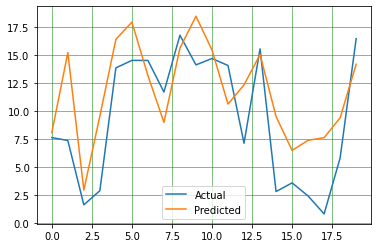

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,14.108177,8.322345,5.785832,41.010485
1,5.525000,13.182020,-7.657020,138.588602
2,13.850571,13.795060,0.055511,0.400785
3,14.079337,9.900387,4.178950,29.681443
4,4.713000,15.964689,-11.251689,238.737293
5,19.794000,15.068769,4.725231,23.872037
6,3.279000,11.588513,-8.309513,253.416062
7,2.020000,9.418632,-7.398632,366.268926
8,14.332944,12.307250,2.025693,14.133128
9,23.032000,14.396264,8.635736,37.494510


###without hyperparameter tunning

In [ ]:


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_fs,y_train)

RandomForestRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test_fs)
y_prediction 



array([-1.02837437,  0.61006451, -1.11103522, -0.06810651,  0.10274906,
       -0.65724747,  0.846867  , -0.57271946,  0.83808327,  0.79768226,
        0.38615388,  0.3595974 ,  1.42365691,  0.90185467,  1.00885742,
        0.35889743,  0.33989157, -0.66127944,  0.56551646, -0.80438637,
        0.19095625, -0.24205102,  0.2106118 , -0.02754137,  0.68960807,
        0.29197188, -0.05958732,  0.31497791, -0.92209451,  0.51070742,
        0.6014038 ,  0.21295959, -0.24143193, -0.91171766,  1.22906956,
        0.46805646, -0.85337599, -1.13513755,  0.26776237,  0.12631433,
        0.05292738,  1.37028917, -0.92274813, -1.01828346, -0.19643571,
        1.13348062,  0.71661309,  0.54335436, -0.18995301, -0.22239171,
        0.69697646, -0.71283885, -1.05383364, -0.35344404, -0.85781316,
       -0.29044653,  0.8440547 ,  0.62754532,  0.15767312,  1.72154504,
       -0.30761194,  0.87915283, -0.24742374, -0.57289177, -0.97126661,
        0.5228985 ,  0.15424048,  0.57516609,  0.20717095, -1.22

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.24593783889920062
mean_sqrd_error is  0.7190553634689072
Root mean squared error of is 0.8479713223151519
Mean Absolute error is 0.631774531801458


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 0.829     ],
       [14.28659707],
       [ 0.307     ],
       [14.29118957],
       [18.489     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 3.98748602],
       [15.64374554],
       [ 3.46416178],
       [10.57708909],
       [11.82673886]])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,0.829000,3.987486,-3.158486,380.999519
1,14.286597,15.643746,-1.357148,9.499452
2,0.307000,3.464162,-3.157162,1028.391458
3,14.291190,10.577089,3.714100,25.988743
4,18.489000,11.826739,6.662261,36.033648
5,3.276000,6.434246,-3.158246,96.405547
6,21.767000,17.474359,4.292641,19.720866
7,14.153141,7.010941,7.142200,50.463710
8,20.777000,17.405943,3.371057,16.224947
9,10.731063,17.091760,-6.360697,59.273697


###Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([-0.75919884,  0.33065574, -0.78782166, -0.10637902, -0.15577072,
       -0.50689491,  0.93038144, -0.80543018,  1.05543466,  0.11139869,
        0.28007295,  0.45138617,  1.25792519,  0.55181021,  0.81609656,
        0.3302221 ,  0.6251035 , -0.65571268,  0.54704825, -0.69048104,
        0.03568507, -0.21094175,  0.0336592 ,  0.21670358,  0.68641795,
        0.08106236,  0.37769728, -0.22686308, -1.14704227,  0.39688488,
        0.50323072,  0.31053484, -0.05483522, -0.97733845,  1.12575762,
        0.54340357, -1.14842327, -0.87894302,  0.06129421, -0.29575787,
       -0.06064815,  1.17406678, -0.72408479, -0.83414013,  0.14419451,
        0.95920307,  0.93152401,  0.97391075, -0.03339441, -0.04375863,
        0.65600446, -0.6078436 , -0.75696864, -0.26897898, -0.76998896,
        0.08563351,  0.83928613,  0.26973237,  0.16664893,  1.0057567 ,
       -0.25074384,  1.12356905, -0.32043977, -0.38217227, -1.07202396,
        0.45232701, -0.20392524,  0.37025531, -0.14874752, -1.18

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.22711557853658992
mean_sqrd_error is  0.7370038138282062
Root mean squared error of is 0.8584892625002402
Mean Absolute error is 0.6363435686714042


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 0.829     ],
       [14.28659707],
       [ 0.307     ],
       [14.29118957],
       [18.489     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 5.74767049],
       [13.52276016],
       [ 5.55676699],
       [10.29987962],
       [ 9.94365976]])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:


result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERNCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)



,ACTUAL AQI,PREDICTED AQI,DIFFERNCE,PERCENTAGE ERROR
0,0.829000,5.747670,-4.918670,593.325752
1,14.286597,13.522760,0.763837,5.346528
2,0.307000,5.556767,-5.249767,1710.021822
3,14.291190,10.299880,3.991310,27.928466
4,18.489000,9.943660,8.545340,46.218510
5,3.276000,7.464474,-4.188474,127.853301
6,21.767000,18.126764,3.640236,16.723646
7,14.153141,5.439742,8.713399,61.565126
8,20.777000,19.110006,1.666994,8.023268
9,10.731063,11.890514,-1.159452,10.804633


##FB Prophet

In [ ]:
pip install fbprophet

In [ ]:
import fbprophet

In [ ]:
so2

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,12.233294
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,13.117833
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,13.831895
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,14.139504
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,14.055125
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,21.132000
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,7.310000
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,10.482000
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,7.460000


In [ ]:
df=so2[['Date', 'SO2']]
df

,Date,SO2
0,01-01-16,12.233294
1,02-01-16,13.117833
2,03-01-16,13.831895
3,04-01-16,14.139504
4,05-01-16,14.055125
...,...,...
1456,27-12-19,21.132000
1457,28-12-19,7.310000
1458,29-12-19,10.482000
1459,30-12-19,7.460000


In [ ]:
df=df.rename(columns={'Date': 'ds', 'SO2': 'y'})

In [ ]:
df

,ds,y
0,01-01-16,12.233294
1,02-01-16,13.117833
2,03-01-16,13.831895
3,04-01-16,14.139504
4,05-01-16,14.055125
...,...,...
1456,27-12-19,21.132000
1457,28-12-19,7.310000
1458,29-12-19,10.482000
1459,30-12-19,7.460000


In [ ]:
# convert the 'Date' column to datetime format
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2019-01-01  11.996917    2.066558   21.087915
1 2019-02-01  10.085682    0.588054   19.162575
2 2019-03-01  10.529321    1.169998   20.247557
3 2019-04-01  13.798288    4.761960   23.669232
4 2019-05-01  12.548505    2.853485   22.357424


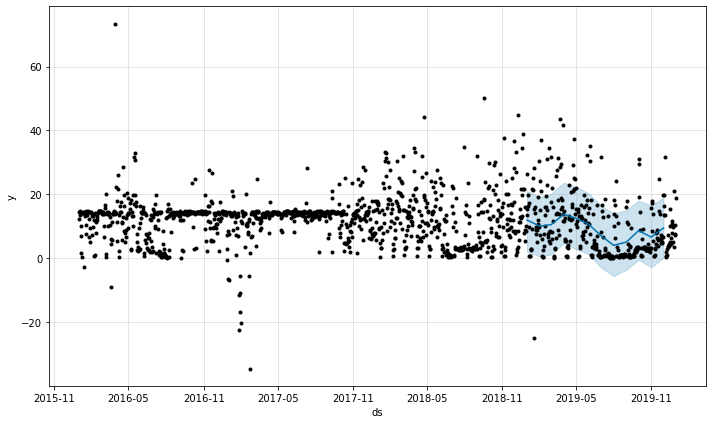

In [ ]:
from pandas import DataFrame
from matplotlib import pyplot
future = list()
for i in range(1, 13):
	date = '2019-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

###Ensembling approach

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [ ]:


lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()



In [ ]:


estimators = [('lr',lr),('dt',dt),('svr',svr)]



In [ ]:


for estimator in estimators:
  scores = cross_val_score(estimator[1],x_train,y_train,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))



lr 0.26
dt -0.36
svr 0.27


In [ ]:


from sklearn.ensemble import VotingRegressor



In [ ]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,x_train,y_train,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.25
